In [1]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [9]:
# Parameters
learning_rate = 0.01
training_epochs = 25
batch_size = 100
display_step = 1



# tf Graph Input
x = tf.placeholder(tf.float32, [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder(tf.float32, [None, 10]) # 0-9 digits recognition => 10 classes

# Set model weights
# W = tf.Variable(tf.zeros([784, 10]))
W = tf.Variable(tf.random_uniform([784, 10]))

b = tf.Variable(tf.zeros([10]))

# Construct model
y_pred = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax
# y_pred = tf.matmul(x, W) + b

# Minimize error using cross entropy
loss = tf.reduce_mean(-tf.reduce_sum(y*tf.log(y_pred), reduction_indices=1))
# loss = tf.reduce_mean(tf.square(y_pred - y))
grad_input = tf.gradients(loss, x)[0]

# Gradient Descent
# optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()



Epoch: 0001 cost= 1.927479186
Epoch: 0002 cost= 0.985616101
Epoch: 0003 cost= 0.768157658
Epoch: 0004 cost= 0.665464267
Epoch: 0005 cost= 0.603922852
Epoch: 0006 cost= 0.562225222
Epoch: 0007 cost= 0.531758446
Epoch: 0008 cost= 0.508280439
Epoch: 0009 cost= 0.489533124
Epoch: 0010 cost= 0.474076727
Epoch: 0011 cost= 0.461075474
Epoch: 0012 cost= 0.450054493
Epoch: 0013 cost= 0.440441170
Epoch: 0014 cost= 0.431911310
Epoch: 0015 cost= 0.424440937
Epoch: 0016 cost= 0.417667174
Epoch: 0017 cost= 0.411621388
Epoch: 0018 cost= 0.406088345
Epoch: 0019 cost= 0.401081371
Epoch: 0020 cost= 0.396404868
Epoch: 0021 cost= 0.392133246
Epoch: 0022 cost= 0.388137289
Epoch: 0023 cost= 0.384462404
Epoch: 0024 cost= 0.381000551
Epoch: 0025 cost= 0.377785307
Optimization Finished!
Accuracy: 0.8991
Adversarial Accuracy: 0.45


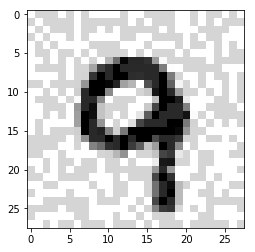

In [15]:

# Start training
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Fit training using batch data
            _, c = sess.run([optimizer, loss], feed_dict={x: batch_xs,
                                                          y: batch_ys})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))

    print ("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y, 1))
    # Calculate accuracy for 3000 examples
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print ("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))
       
    #prediction for one image
    y_prediction = sess.run([y_pred], feed_dict={x:  mnist.test.images,y:  mnist.test.labels})
#     print (np.argmax(y_prediction),np.max(y_prediction))
#     print (y_prediction)
    
    #adversial 
    grad = sess.run([grad_input], feed_dict={x:  mnist.test.images,y:  mnist.test.labels})
    grad = np.array(grad)
    grad = grad.reshape(10000,784)
    eps = 0.1
    adversarial_images = []

    for i in range(100):
        img_ad = mnist.test.images[i] + eps * np.sign(grad[mnist.test.labels.tolist()[i].index(1.0)]) 
        adversarial_images.append(img_ad)
        
    plt.imshow(adversarial_images[i].reshape(28,28), cmap='binary')
    
    #prediction for adversial image
    y_prediction = sess.run([y_pred], feed_dict={x:  adversarial_images,y:  mnist.test.labels[:100]})
    print ("Adversarial Accuracy:", accuracy.eval({x: adversarial_images, y: mnist.test.labels[:100]}))
#     print (np.argmax(y_prediction),np.max(y_prediction))
#     print (y_prediction)
    

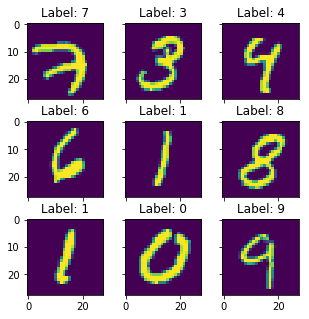

In [42]:
#https://github.com/jasonicarter/MNIST-adversarial-images/blob/master/MNIST-adversarial-images.ipynb
image_list = mnist.train.images[0:9]
image_list_labels = mnist.train.labels[0:9]

# https://matplotlib.org/mpl_toolkits/axes_grid/users/overview.html#imagegrid
fig = plt.figure(1, (5., 5.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(3, 3),  # creates 2x2 grid of axes
                 axes_pad=0.3,  # pad between axes in inch.
                 )

for i in range(len(image_list)):
    image = image_list[i].reshape(28,28)
    grid[i].imshow(image)
    grid[i].set_title('Label: {0}'.format(image_list_labels[i].argmax()))

plt.show()